## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Upload the Data and Read the .csv File

In [2]:
df = pd.read_csv('salaries_by_college_major.csv')

In [3]:
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,46000.0,77100.0,42200.0,152000.0,Business
1,Aerospace Engineering,57700.0,101000.0,64300.0,161000.0,STEM
2,Agriculture,42600.0,71900.0,36300.0,150000.0,Business
3,Anthropology,36800.0,61500.0,33800.0,138000.0,HASS
4,Architecture,41600.0,76800.0,50600.0,136000.0,Business


## Data Exploration and Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Undergraduate Major                51 non-null     object 
 1   Starting Median Salary             50 non-null     float64
 2   Mid-Career Median Salary           50 non-null     float64
 3   Mid-Career 10th Percentile Salary  50 non-null     float64
 4   Mid-Career 90th Percentile Salary  50 non-null     float64
 5   Group                              50 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.5+ KB


In [5]:
df.isnull().sum() #checking for null values

Undergraduate Major                  0
Starting Median Salary               1
Mid-Career Median Salary             1
Mid-Career 10th Percentile Salary    1
Mid-Career 90th Percentile Salary    1
Group                                1
dtype: int64

In [6]:
df = df.dropna(axis=0) #dropping the row which has null value

In [7]:
df.describe()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary
count,50.000000,50.00000,50.000000,50.000000
mean,44310.000000,74786.00000,43408.000000,142766.000000
std,9360.866217,16088.40386,12000.779567,27851.249267
min,34000.000000,52000.00000,26700.000000,96400.000000
25%,37050.000000,60825.00000,34825.000000,124250.000000
50%,40850.000000,72000.00000,39400.000000,145500.000000
75%,49875.000000,88750.00000,49850.000000,161750.000000
max,74300.000000,107000.00000,71900.000000,210000.000000


In [8]:
df.corr()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary
Starting Median Salary,1.000000,0.848454,0.935673,0.474690
Mid-Career Median Salary,0.848454,1.000000,0.896755,0.806849
Mid-Career 10th Percentile Salary,0.935673,0.896755,1.000000,0.564351
Mid-Career 90th Percentile Salary,0.474690,0.806849,0.564351,1.000000


## Highest and Lowest Earning Degrees

In [9]:
df.nlargest(1,'Starting Median Salary') #Undergraduate major with highest starting salary

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
43,Physician Assistant,74300.0,91700.0,66400.0,124000.0,STEM


In [10]:
df.nsmallest(1,'Starting Median Salary') #Undergraduate major with lowest starting salary

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
49,Spanish,34000.0,53100.0,31000.0,96400.0,HASS


In [11]:
df.nlargest(1,'Mid-Career Median Salary') #Undergraduate major with highest Mid-Career Salary

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
8,Chemical Engineering,63200.0,107000.0,71900.0,194000.0,STEM


In [12]:
df.nsmallest(1,'Mid-Career Median Salary') #Undergraduate major with lowest Mid-Career Median Salary

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
18,Education,34900.0,52000.0,29300.0,102000.0,HASS


In [13]:
df.nlargest(1,'Mid-Career 90th Percentile Salary') #Undergraduate major with highest Mid-Career 90th Percentile Salary

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
17,Economics,50100.0,98600.0,50600.0,210000.0,Business


In [14]:
df.nsmallest(1,'Mid-Career 90th Percentile Salary') #Undergraduate major with highest Mid-Career 90th Percentile Salary

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
47,Religion,34100.0,52000.0,29700.0,96400.0,HASS


## Adding 'Spread' column to find the potential risk

In [15]:
df['Spread'] = df['Mid-Career 90th Percentile Salary'] - df['Mid-Career 10th Percentile Salary']

In [16]:
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group,Spread
0,Accounting,46000.0,77100.0,42200.0,152000.0,Business,109800.0
1,Aerospace Engineering,57700.0,101000.0,64300.0,161000.0,STEM,96700.0
2,Agriculture,42600.0,71900.0,36300.0,150000.0,Business,113700.0
3,Anthropology,36800.0,61500.0,33800.0,138000.0,HASS,104200.0
4,Architecture,41600.0,76800.0,50600.0,136000.0,Business,85400.0


In [17]:
df.sort_values('Spread',ascending=True).head() #Undergraduate Major with lower Mid carrer spread

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group,Spread
40,Nursing,54200.0,67000.0,47600.0,98300.0,Business,50700.0
43,Physician Assistant,74300.0,91700.0,66400.0,124000.0,STEM,57600.0
41,Nutrition,39900.0,55300.0,33900.0,99200.0,HASS,65300.0
49,Spanish,34000.0,53100.0,31000.0,96400.0,HASS,65400.0
27,Health Care Administration,38800.0,60600.0,34600.0,101000.0,Business,66400.0


## Degrees with the Highest Potential

In [18]:
df.sort_values('Mid-Career 90th Percentile Salary',ascending=False).head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group,Spread
17,Economics,50100.0,98600.0,50600.0,210000.0,Business,159400.0
22,Finance,47900.0,88300.0,47200.0,195000.0,Business,147800.0
8,Chemical Engineering,63200.0,107000.0,71900.0,194000.0,STEM,122100.0
37,Math,45400.0,92400.0,45200.0,183000.0,STEM,137800.0
44,Physics,50300.0,97300.0,56000.0,178000.0,STEM,122000.0


In [19]:
df[['Undergraduate Major','Spread']].sort_values('Spread',ascending=False).head()

,Undergraduate Major,Spread
17,Economics,159400.0
22,Finance,147800.0
37,Math,137800.0
36,Marketing,132900.0
42,Philosophy,132500.0


In [20]:
df[['Undergraduate Major','Mid-Career Median Salary']].sort_values('Mid-Career Median Salary',ascending=False).head()

,Undergraduate Major,Mid-Career Median Salary
8,Chemical Engineering,107000.0
12,Computer Engineering,105000.0
19,Electrical Engineering,103000.0
1,Aerospace Engineering,101000.0
17,Economics,98600.0


## Grouping Data

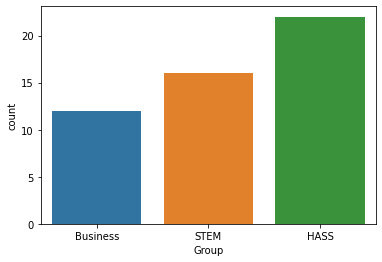

In [21]:
sns.countplot(data=df,x='Group')
plt.show()

In [22]:
df.groupby('Group').mean().round(2) 

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Spread
Group,,,,,
Business,44633.33,75083.33,43566.67,147525.00,103958.33
HASS,37186.36,62968.18,34145.45,129363.64,95218.18
STEM,53862.50,90812.50,56025.00,157625.00,101600.00


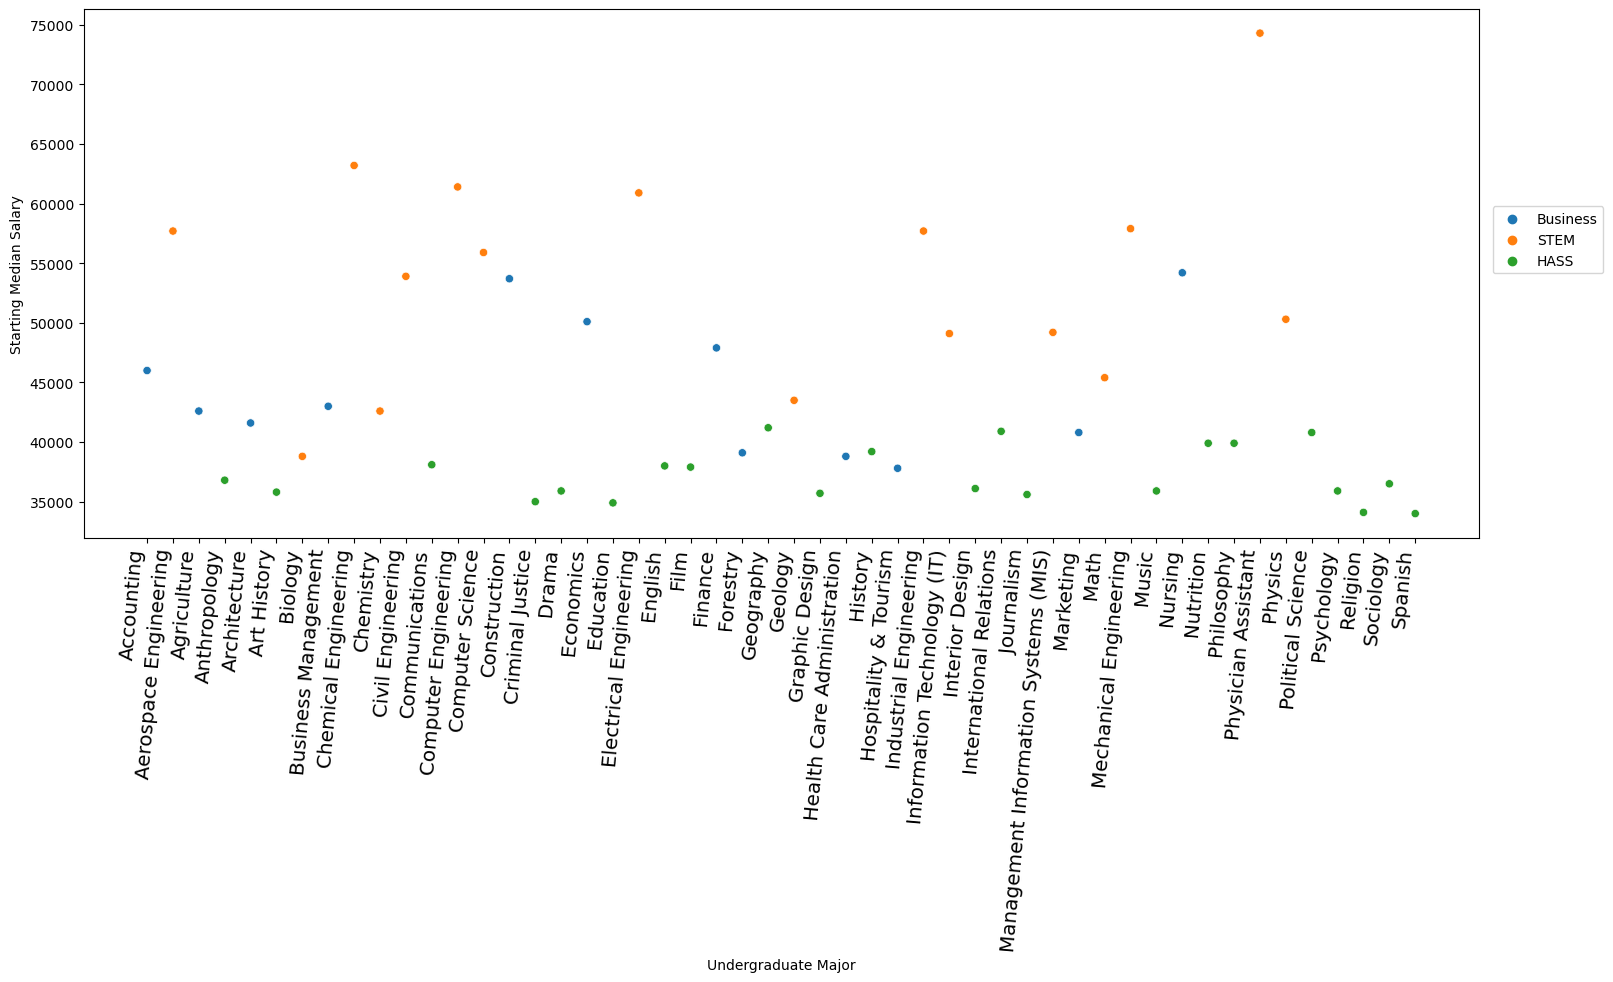

In [23]:
plt.figure(figsize=(18,7),dpi=100)
sns.scatterplot(data=df,x='Undergraduate Major',y='Starting Median Salary',hue='Group')
plt.xticks(rotation=85, horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.legend(loc= (1.01,0.5))
plt.show()